In [12]:
# Assignment 7
# Name: Saurabh Isane
# Roll No: 122B1F035

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [3]:

# Load and preprocess data
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['quality'] = data.target



In [4]:

# Convert wine quality to binary: 1 (good) if quality == 2 (best class), else 0
df['label'] = df['quality'].apply(lambda q: 1 if q == 2 else 0)


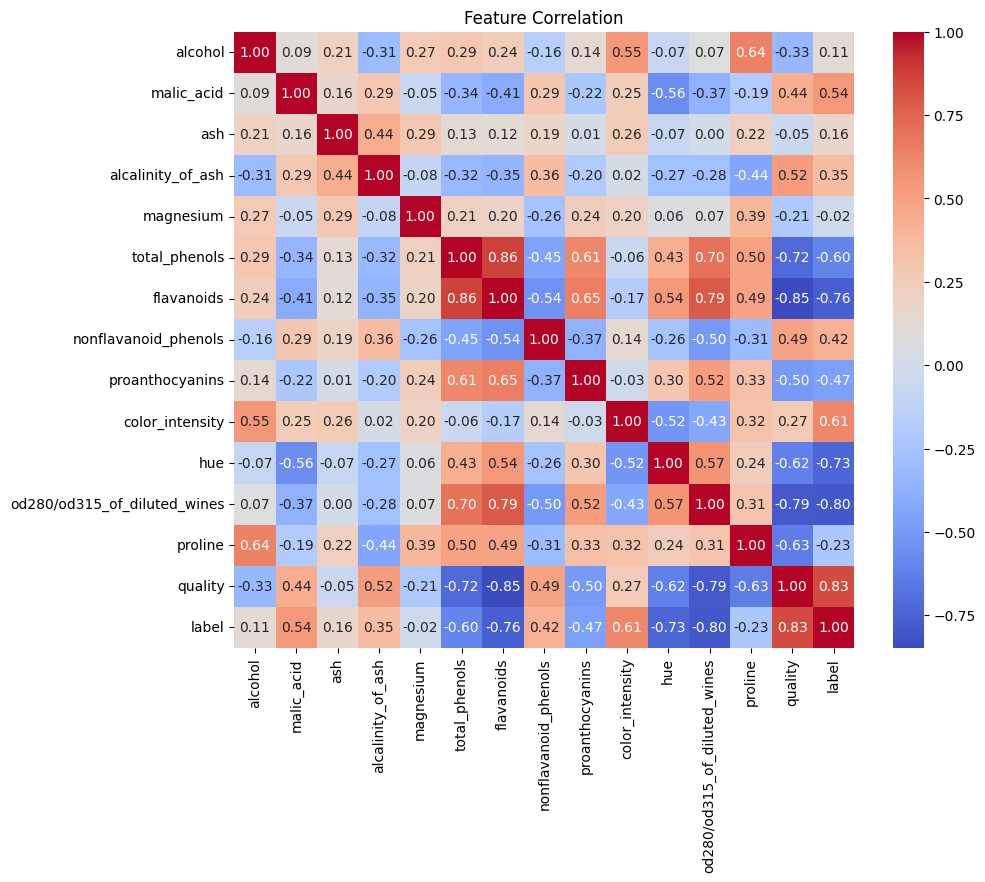

In [5]:

# Drop unused columns if needed (optional: correlation analysis)
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [6]:

X = df.drop(['quality', 'label'], axis=1)
y = df['label']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:

# Build improved model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile model with Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Use early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [9]:

# Train model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7410 - loss: 0.6128 - val_accuracy: 0.6897 - val_loss: 0.5607
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8296 - loss: 0.4904 - val_accuracy: 0.8276 - val_loss: 0.4805
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9400 - loss: 0.4071 - val_accuracy: 0.8966 - val_loss: 0.4109
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9139 - loss: 0.3374 - val_accuracy: 0.9655 - val_loss: 0.3524
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9342 - loss: 0.2608 - val_accuracy: 0.9655 - val_loss: 0.3008
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9632 - loss: 0.2429 - val_accuracy: 0.9655 - val_loss: 0.2573
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9802 - loss: 0.1974 - val_accuracy: 1.0000 - val_loss: 0.2189
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9873 - loss: 0.1370 - val_accuracy: 1.0000 - val_loss:

In [10]:

# Evaluate
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
print(classification_report(y_test, y_pred_classes))
print("Accuracy:", accuracy_score(y_test, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy: 1.0


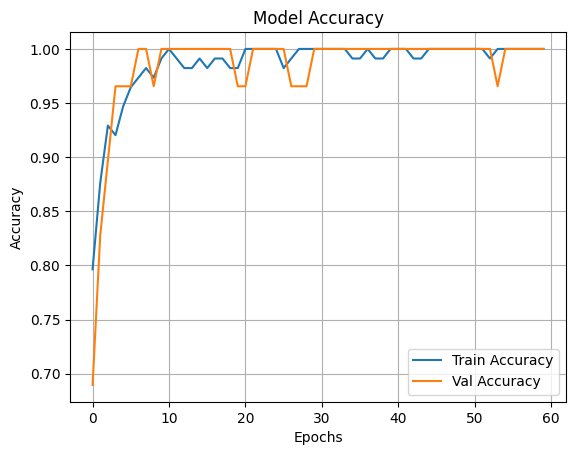

In [11]:

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()